In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import scipy.signal as signal
import numba
from numba import jit

In [2]:
def extract_weightmap(im):
    "selects the non white part of the image"
    ww = np.zeros(shape=im.shape[:2])
    ww[np.where(im.sum(axis=2) < 4.)] = 1.
    return ww

def invert_weightmap(ww):
    return 1 - ww

# Loading maps

In [3]:
map_oceans = plt.imread("../maps/LOTR_MAPS_oceans.png")
map_rivers = plt.imread("../maps/LOTR_MAPS_rivers.png")
map_hills = plt.imread("../maps/LOTR_MAPS_hills.png")
map_mountains = plt.imread("../maps/LOTR_MAPS_mountains.png")
map_ridges = plt.imread("../maps/LOTR_MAPS_ridges.png")

In [4]:
wmap_oceans = extract_weightmap(map_oceans)
wmap_rivers = extract_weightmap(map_rivers)
wmap_hills = extract_weightmap(map_hills)
wmap_mountains = extract_weightmap(map_mountains)
wmap_ridges = extract_weightmap(map_ridges)

In [5]:
wmap_land = invert_weightmap(wmap_oceans)

In [6]:
raw_elevation = np.load("lotr_map_raw_elevation.npz")["arr_0"]

In [7]:
np.unique(wmap_rivers)

array([0., 1.])

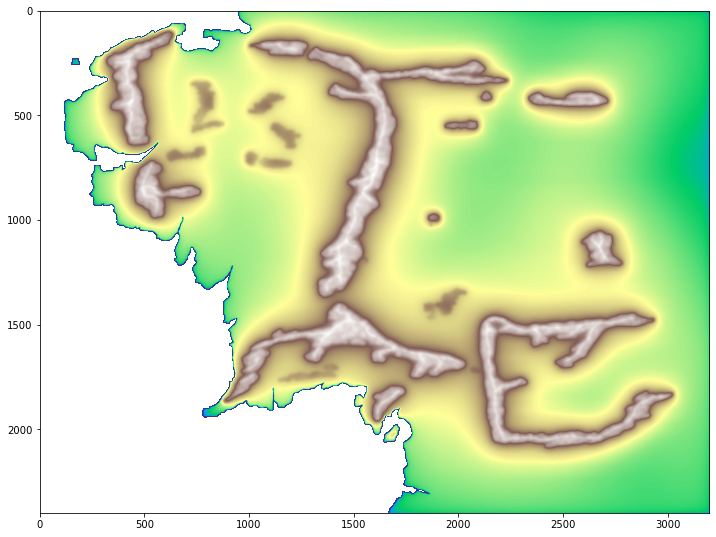

In [8]:

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(raw_elevation -0.00001, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm())



# Rivers must flow downhill

First establish rainfall patterns from river density

Smooth the terrain around rivers, rivers are in a local gradient valley at all times

Rhun and Nurn are inland seas, they are assumed to evaporate naturally, once water gets there

# Identify river systems first

In [16]:
waters = ((wmap_oceans + wmap_rivers) > 0).astype(float)

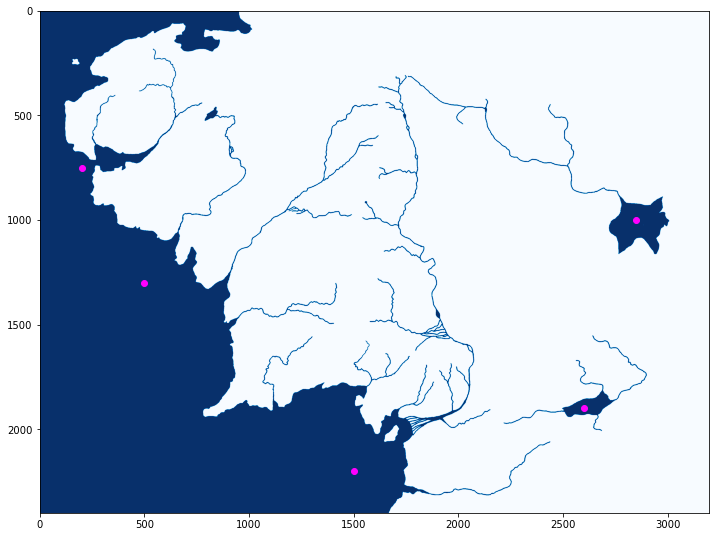

In [20]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(waters, cmap=plt.cm.Blues)

points = np.array([
    [1500, 2200],  # belfalas
    [500, 1300], # baranduin
    [200, 750], # lhun
    [2850, 1000], # rhun
    [2600, 1900], # nurn
])
vals = np.arange(len(points))

ax.scatter(points[:, 0], points[:, 1], color="magenta")

In [21]:
vmap = waters.copy()
vmap[vmap == 0] = 6
vmap[vmap == 1] = -1

recent = []
recent_values = []
for i, pp in enumerate(points):
    vmap[pp[1],pp[0]] = vals[i]
    recent.append((pp[1], pp[0]))
    recent_values.append(vals[i])

def color_neighbours(pos, vmap, value, maxes):
    plist = []
    vlist = []
    for a in (-1, 0, 1):
        for b in (-1, 0, 1):
            i = pos[0] + a
            j = pos[1] + b
            if i > 0 and j > 0 and i < maxes[0] and j < maxes[1] and vmap[i, j] < 0 :
                vmap[i, j] = value
                plist.append((i, j))
                vlist.append(value)
    return plist, vlist    
    
maxes = vmap.shape
n = 0
nmax = 3000
while len(recent):
    print("N", n)
    print(len(recent))
    new_recent = []
    new_recent_values = []
    for i, pp in enumerate(recent):
        plist, vlist = color_neighbours(pp, vmap, recent_values[i], maxes)
        new_recent = new_recent + plist
        new_recent_values = new_recent_values + vlist
        
    recent = new_recent
    recent_values = new_recent_values
    n += 1

N 0
5
N 1
40
N 2
80
N 3
120
N 4
160
N 5
200
N 6
240
N 7
280
N 8
320
N 9
360
N 10
400
N 11
440
N 12
480
N 13
520
N 14
560
N 15
600
N 16
640
N 17
680
N 18
720
N 19
760
N 20
800
N 21
840
N 22
880
N 23
920
N 24
960
N 25
1000
N 26
1040
N 27
1080
N 28
1108
N 29
1141
N 30
1176
N 31
1206
N 32
1229
N 33
1246
N 34
1277
N 35
1310
N 36
1339
N 37
1372
N 38
1401
N 39
1431
N 40
1458
N 41
1486
N 42
1515
N 43
1545
N 44
1572
N 45
1599
N 46
1627
N 47
1648
N 48
1651
N 49
1677
N 50
1699
N 51
1725
N 52
1752
N 53
1777
N 54
1799
N 55
1821
N 56
1846
N 57
1873
N 58
1900
N 59
1926
N 60
1954
N 61
1977
N 62
1990
N 63
2016
N 64
2041
N 65
2070
N 66
2094
N 67
2123
N 68
2147
N 69
2176
N 70
2185
N 71
2202
N 72
2226
N 73
2250
N 74
2264
N 75
2277
N 76
2290
N 77
2285
N 78
2293
N 79
2292
N 80
2303
N 81
2316
N 82
2336
N 83
2359
N 84
2383
N 85
2407
N 86
2428
N 87
2437
N 88
2456
N 89
2476
N 90
2495
N 91
2516
N 92
2533
N 93
2554
N 94
2575
N 95
2588
N 96
2600
N 97
2615
N 98
2633
N 99
2650
N 100
2667
N 101
2685
N 102
2701
N 103


N 761
1264
N 762
1259
N 763
1262
N 764
1258
N 765
1253
N 766
1248
N 767
1246
N 768
1245
N 769
1246
N 770
1244
N 771
1245
N 772
1235
N 773
1229
N 774
1226
N 775
1225
N 776
1226
N 777
1222
N 778
1219
N 779
1215
N 780
1213
N 781
1212
N 782
1211
N 783
1207
N 784
1204
N 785
1203
N 786
1201
N 787
1197
N 788
1189
N 789
1191
N 790
1186
N 791
1182
N 792
1179
N 793
1178
N 794
1174
N 795
1172
N 796
1166
N 797
1166
N 798
1163
N 799
1162
N 800
1163
N 801
1165
N 802
1170
N 803
1165
N 804
1162
N 805
1161
N 806
1161
N 807
1158
N 808
1160
N 809
1156
N 810
1158
N 811
1163
N 812
1157
N 813
1153
N 814
1152
N 815
1149
N 816
1146
N 817
1144
N 818
1139
N 819
1137
N 820
1135
N 821
1134
N 822
1131
N 823
1124
N 824
1125
N 825
1120
N 826
1125
N 827
1122
N 828
1120
N 829
1118
N 830
1115
N 831
1110
N 832
1110
N 833
1109
N 834
1097
N 835
1095
N 836
1094
N 837
1088
N 838
1086
N 839
1081
N 840
1079
N 841
1076
N 842
1073
N 843
1062
N 844
1063
N 845
1062
N 846
1064
N 847
1060
N 848
1056
N 849
1052
N 850
1049
N 851
1046

N 1794
11
N 1795
12
N 1796
13
N 1797
14
N 1798
14
N 1799
12
N 1800
13
N 1801
11
N 1802
11
N 1803
11
N 1804
9
N 1805
10
N 1806
10
N 1807
11
N 1808
11
N 1809
12
N 1810
12
N 1811
12
N 1812
12
N 1813
12
N 1814
11
N 1815
11
N 1816
12
N 1817
12
N 1818
12
N 1819
12
N 1820
12
N 1821
10
N 1822
10
N 1823
10
N 1824
10
N 1825
11
N 1826
10
N 1827
10
N 1828
10
N 1829
10
N 1830
10
N 1831
10
N 1832
10
N 1833
11
N 1834
9
N 1835
9
N 1836
10
N 1837
12
N 1838
13
N 1839
15
N 1840
15
N 1841
17
N 1842
17
N 1843
14
N 1844
15
N 1845
16
N 1846
15
N 1847
16
N 1848
15
N 1849
16
N 1850
14
N 1851
15
N 1852
15
N 1853
15
N 1854
16
N 1855
16
N 1856
16
N 1857
17
N 1858
18
N 1859
16
N 1860
14
N 1861
12
N 1862
11
N 1863
10
N 1864
10
N 1865
10
N 1866
10
N 1867
9
N 1868
10
N 1869
10
N 1870
9
N 1871
10
N 1872
11
N 1873
10
N 1874
10
N 1875
10
N 1876
11
N 1877
10
N 1878
11
N 1879
10
N 1880
11
N 1881
9
N 1882
9
N 1883
9
N 1884
8
N 1885
11
N 1886
9
N 1887
10
N 1888
10
N 1889
11
N 1890
11
N 1891
10
N 1892
10
N 1893
11
N 1894
10


In [22]:
np.savez("vmap.npz", vmap)

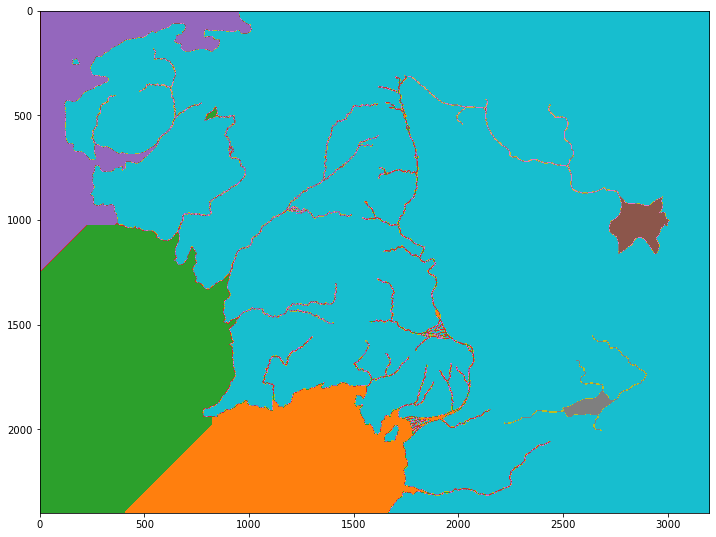

In [23]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(vmap, cmap=plt.cm.tab10)

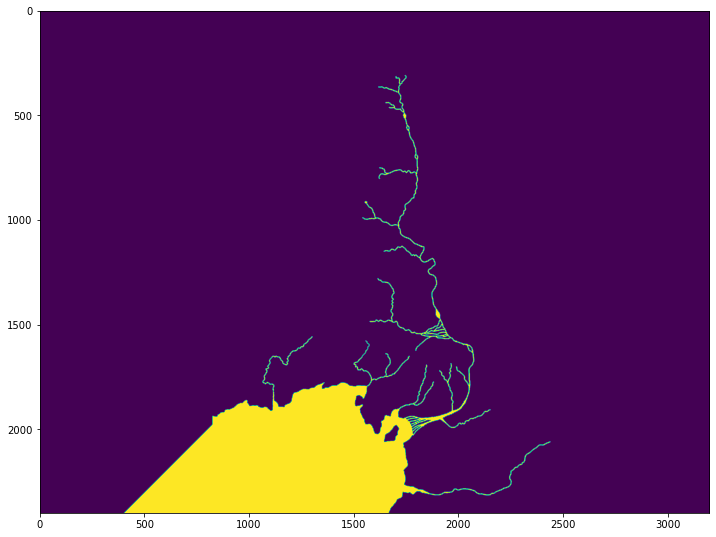

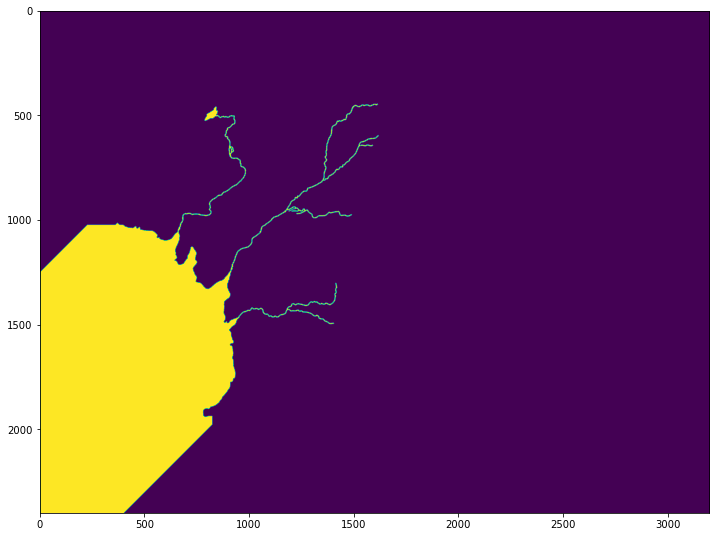

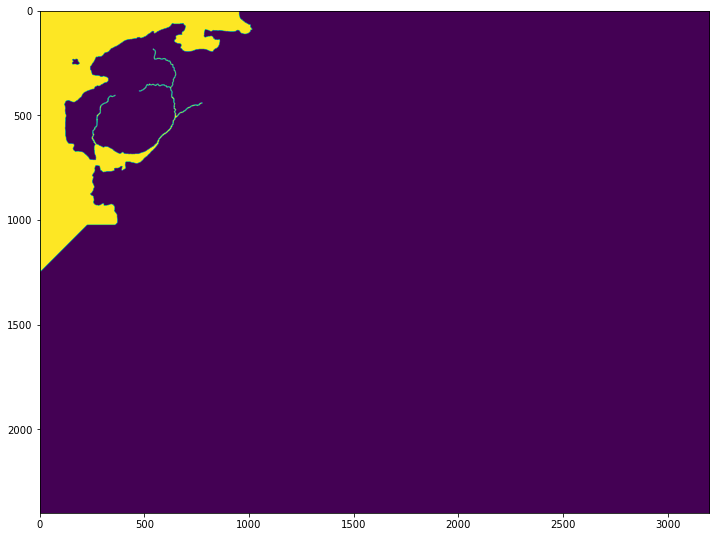

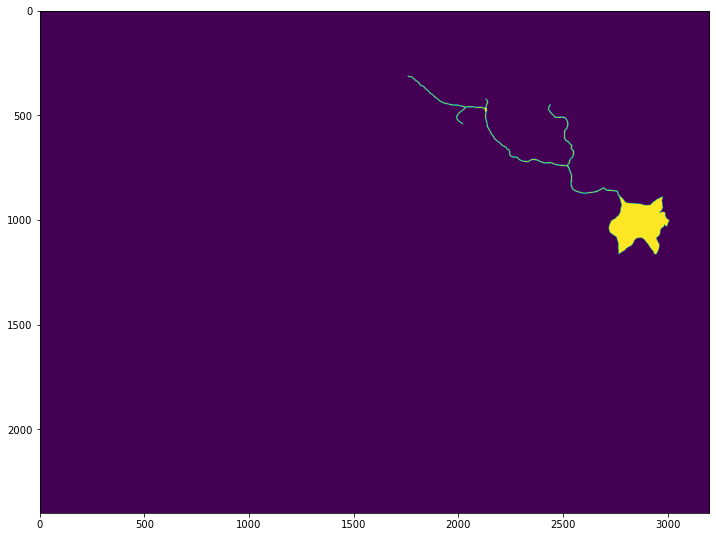

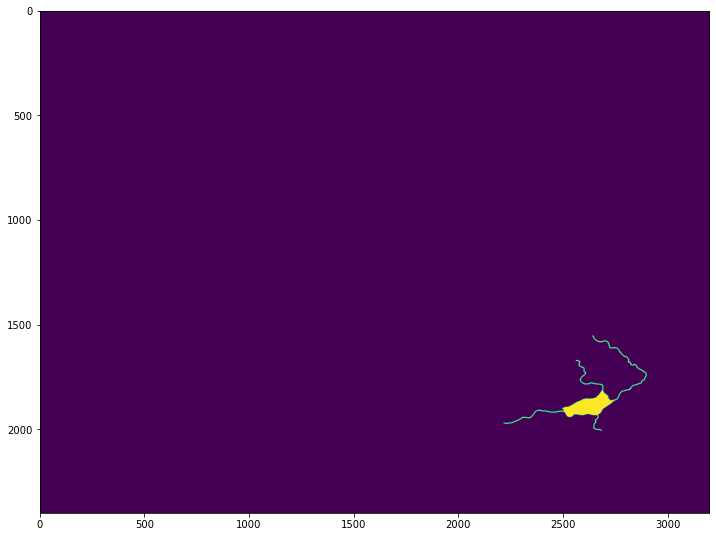

In [24]:
for i in np.arange(5):
    arr0 = np.zeros(vmap.shape)
    arr0[vmap==i] = 1
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(arr0)

Each river system should reach it's minimum from all points

# Now reshape the land so that all rivers flow downhill

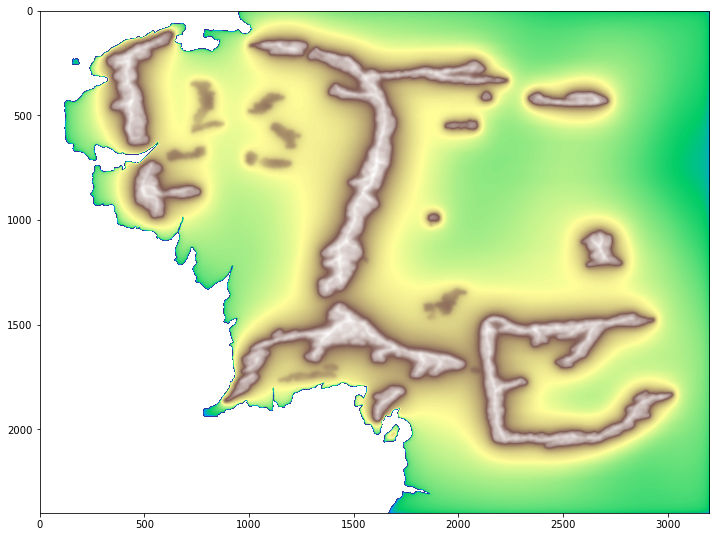

In [25]:

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(raw_elevation -1, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm())

In [26]:
def distance_kernel(half_extent=50):
    size = half_extent * 2 + 1
    kernel = np.zeros((size, size))
    vals = np.arange(-half_extent,half_extent+1)
    xx, yy = np.meshgrid(vals, vals, indexing='xy')
    # y, x = np.ogrid[-half_extent:half_extent+1, -half_extent:half_extent+1]
    distance = np.sqrt(xx**2 + yy**2)
    return distance
    
def tophat(dists, scale=50.):
    kernel = np.zeros(dists.shape)
    kernel[dists < radius] = 1
    kernel = kernel / kernel.sum()
    return kernel

def gaussian(dists, scale=50.):
    kernel = np.zeros(dists.shape)
    kernel = np.exp(- dists**2. / (2 * scale**2.))
    kernel = kernel / kernel.sum()
    return kernel

def triangle(dists, scale=50):
    """triangle kernel, scale is when it hits zero"""
    kernel = np.zeros(dists.shape)
    kernel = scale - dists
    kernel[kernel < 0] = 0
    kernel = kernel / kernel.sum()
    return kernel

kernels = {
    "gauss": gaussian,
    "tophat": tophat,
    "triangle": triangle,
}


In [27]:
def convolve_map(canvas, scale, which = "gauss",):
    pad_width = scale*3
    padded = np.pad(canvas, pad_width = scale*3)
    half_extent = scale*2
    dists = distance_kernel(half_extent = half_extent)    
    kern = kernels[which](dists, scale = scale)
    
    # There's some shape difference here, which needs to be manually corrected with the padding
    # just offset the convolved image by the half_extent of the kernel...
    tmp = np.fft.irfft2(np.fft.rfft2(padded) * np.fft.rfft2(kern, padded.shape))
    tmp = tmp[pad_width+half_extent:-pad_width+half_extent, pad_width+half_extent:-pad_width+half_extent]
    return tmp

In [30]:
tmp = convolve_map(wmap_rivers, 30, which = "triangle")
river_elevation = raw_elevation - tmp * 0.2 * raw_elevation

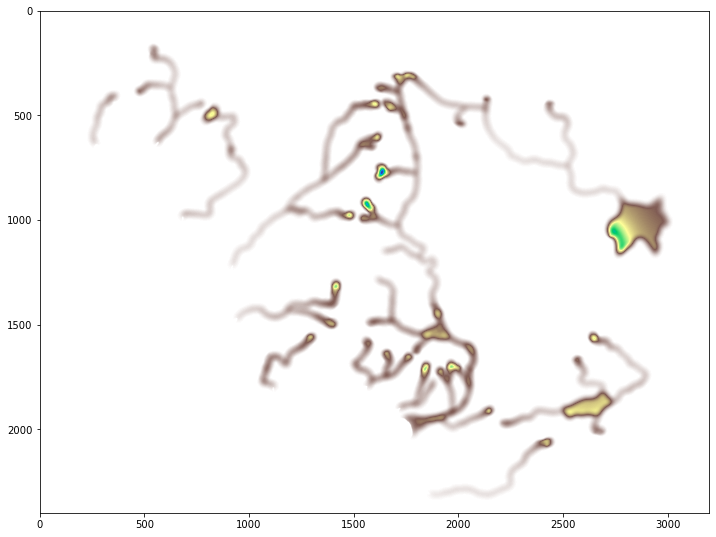

In [31]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(river_elevation - raw_elevation, cmap=plt.cm.terrain)

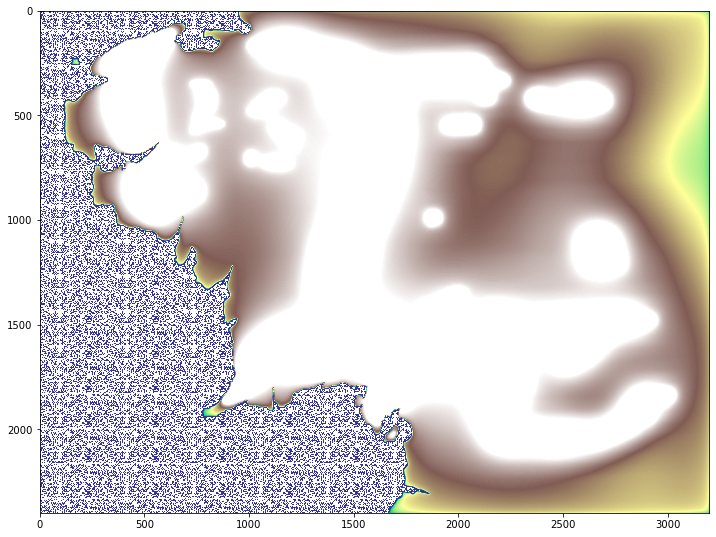

In [40]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(raw_elevation, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm(vmax=400))

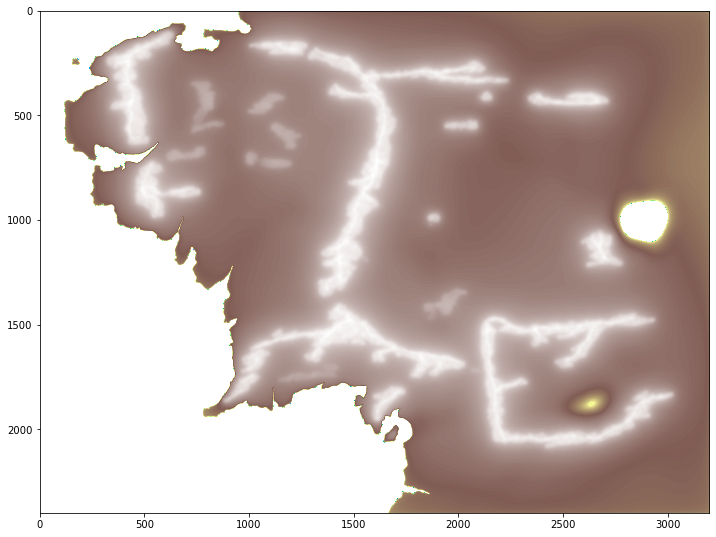

In [208]:

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
ax.imshow(river_elevation -1, cmap=plt.cm.terrain, norm=mpl.colors.LogNorm())